# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Divisão da base em treino, validação e teste**
    - 3.1. Salvando os dataframes em formato parquet
4. **Análise do dataframe _df_train_val_**
    - 4.1. Correção e ajuste das variáveis
    - 4.2. Análise das medidas estatísticas
        - 4.2.1. Análise descritiva das variáveis
        - 4.2.2. Distribuição dos dados em gráfico boxplot
        - 4.2.3. Análise dos outliers identificados
        - 4.2.4. Distribuição dos dados em gráfico histograma
        - 4.2.5. Distribuição dos dados em gráfico de barras (countplot)
5. **Análise exploratória dos dados**


<br>

---

<br>

## 1. Importação de bibliotecas

In [238]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import os

from sklearn.model_selection import train_test_split

In [239]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar para exibir todas as colunas do Dataframe
pd.set_option('display.max_columns', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [240]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 133270


In [241]:
# Caminho do arquivo de dados
caminho = f'dados/ABT'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')

In [242]:
df.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_card,client_id_card,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_client,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,code,description,transaction_id,is_fraud
0,7475806,2010-01-01 09:05:00,1840,4568,$2.02,Swipe Transaction,35451,Beaverton,OR,97005.0,5812,None,4568,1840,Visa,Debit (Prepaid),4733359418335581,09/2021,67,YES,2,$4,09/2004,2008,No,1840,46,71,1974,2,Female,576 Martin Luther King Street,45.49,-122.80,$21702,$44249,$103229,706,5,5812,Eating Places and Restaurants,7475806.0,No
1,7477473,2010-01-01 15:08:00,538,4161,$7.48,Swipe Transaction,26810,Winterville,NC,28590.0,5541,None,4161,538,Mastercard,Debit,5885105668024939,12/2014,750,YES,2,$6993,08/2005,2016,No,538,66,69,1954,2,Female,7888 Fourth Street,35.30,-77.15,$14844,$30265,$36789,814,4,5541,Service Stations,7477473.0,No
2,7477784,2010-01-01 16:18:00,724,2876,$1.70,Swipe Transaction,59935,Cushing,OK,74023.0,5499,None,2876,724,Mastercard,Debit,5832356224925490,06/2024,245,YES,2,$16476,05/2005,2008,No,724,45,72,1974,5,Female,819 El Camino Boulevard,35.97,-96.76,$17237,$35142,$107898,731,4,5499,Miscellaneous Food Stores,NaN,None
3,7477811,2010-01-01 16:25:00,377,1175,$-53.00,Swipe Transaction,43293,Withee,WI,54498.0,5499,None,1175,377,Mastercard,Debit,5009400051376027,11/2023,417,YES,1,$30403,02/2009,2014,No,377,80,67,1940,1,Female,305 Pine Avenue,47.39,-122.26,$24884,$39110,$363,750,5,5499,Miscellaneous Food Stores,NaN,None
4,7478410,2010-01-01 18:55:00,1362,2145,$-295.00,Swipe Transaction,96185,Bladensburg,MD,20710.0,7011,None,2145,1362,Mastercard,Debit,5566695688917047,03/2017,309,NO,2,$29708,03/2007,2009,No,1362,58,67,1962,1,Male,3385 Hill Lane,38.78,-77.27,$35563,$72510,$44317,727,4,7011,"Lodging - Hotels, Motels, Resorts",NaN,None
5,7478830,2010-01-01 21:25:00,1466,5884,$17.59,Online Transaction,16798,ONLINE,None,NaN,4121,None,5884,1466,Mastercard,Debit,5946854129119703,09/2020,405,YES,1,$1866,12/2007,2014,No,1466,36,75,1983,4,Female,3194 Norfolk Street,38.64,-75.61,$17624,$35933,$23451,812,2,4121,Taxicabs and Limousines,NaN,None
6,7479105,2010-01-01 23:02:00,1693,5940,$4.33,Online Transaction,85247,ONLINE,None,NaN,5815,None,5940,1693,Mastercard,Debit,5128104617797218,03/2017,726,YES,1,$33506,12/2008,2011,No,1693,36,69,1983,4,Female,478 East Drive,33.61,-111.89,$36300,$74016,$85204,702,2,5815,"Digital Goods - Media, Books, Apps",7479105.0,No
7,7480284,2010-01-02 11:11:00,1674,2873,$27.78,Swipe Transaction,60569,Jonesboro,AR,72401.0,5300,None,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,$8800,05/2005,2011,No,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,$14172,$26858,$11245,712,2,5300,Wholesale Clubs,7480284.0,No
8,7480339,2010-01-02 11:27:00,1070,4138,$35.20,Swipe Transaction,99256,Marion,IA,52302.0,5411,None,4138,1070,Mastercard,Debit,5588241759620390,08/2022,902,YES,1,$28666,08/2004,2010,No,1070,61,65,1958,11,Male,841 Wessex Boulevard,42.03,-91.58,$25275,$51528,$58509,745,6,5411,"Grocery Stores, Supermarkets",NaN,None
9,7480412,2010-01-02 11:46:00,509,4588,$5.54,Swipe Transaction,60569,Charmco,WV,25958.0,5300,None,4588,509,Visa,Debit,4262181069766792,07/2022,519,YES,1,$12721,09/2005,2015,No,509,33,66,1986,7,Male,239 Sussex Drive,38.41,-82.43,$21842,$44534,$107410,702,4,5300,Wholesale Clubs,7480412.0,No


## 3. Divisão da base em treino, validação e teste

In [243]:
# Criando os dataframes com base no target 'is_fraud'

# DataFrame de treino e validação (valores 'Yes' e 'No')
df_train_val = df[df['is_fraud'].isin(['Yes', 'No'])].copy()

# DataFrame de teste (valores None)
df_test = df[df['is_fraud'].isnull()].copy()

In [244]:
# Dividindo o dataframe de treino e validação, mantendo a proporção das classes do target 'is_fraud'
df_train, df_val = train_test_split(
    df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['is_fraud']
)

In [245]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_train': df_train,
    'df_val': df_val,
    'df_test': df_test,
}

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
print(f'\nVOLUMETRIA')
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]:,}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]:,}')  


VOLUMETRIA

df_train
---------------------------------------------
Quantidade de linhas (registros):  3,566,068
Quantidade de colunas (variáveis): 43

df_val
---------------------------------------------
Quantidade de linhas (registros):  891,518
Quantidade de colunas (variáveis): 43

df_test
---------------------------------------------
Quantidade de linhas (registros):  2,194,300
Quantidade de colunas (variáveis): 43


### 3.1. Salvando os dataframes em formato parquet

In [246]:
# Iteração sobre o dicionário para exportação dos dataframes em formato parquet
for nome, df in dfs.items():
    
    # Diretório onde os dados serão salvos
    caminho = f'dados/dados_parquet/'
    
    # Cria o diretório se não existir
    os.makedirs(caminho, exist_ok=True)
    
    try:      
        # Exportar para Parquet
        df.to_parquet(caminho + nome + '.parquet', engine='pyarrow', index=False)
        
        # Valida a quantidade de linhas e colunas
        print(f'\nO {nome} possui {df.shape[0]:,} linhas e {df.shape[1]:,} colunas')
    except Exception as e:
        print(f'\nErro ao exportar {nome}:\n {e}')

KeyboardInterrupt: 

## 4. Análise do dataframe _df_train_val_

In [ ]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA\n')
print(f'Quantidade de linhas (registros):  {df_train_val.shape[0]:,}')
print(f'Quantidade de colunas (variáveis): {df_train_val.shape[1]:,}')


VOLUMETRIA

Quantidade de linhas (registros):  4,457,586
Quantidade de colunas (variáveis): 43


In [ ]:
df_train_val.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_card,client_id_card,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_client,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,code,description,transaction_id,is_fraud
0,7475806,2010-01-01 09:05:00,1840,4568,$2.02,Swipe Transaction,35451,Beaverton,OR,97005.0,5812,None,4568,1840,Visa,Debit (Prepaid),4733359418335581,09/2021,67,YES,2,$4,09/2004,2008,No,1840,46,71,1974,2,Female,576 Martin Luther King Street,45.49,-122.80,$21702,$44249,$103229,706,5,5812,Eating Places and Restaurants,7475806.0,No
1,7477473,2010-01-01 15:08:00,538,4161,$7.48,Swipe Transaction,26810,Winterville,NC,28590.0,5541,None,4161,538,Mastercard,Debit,5885105668024939,12/2014,750,YES,2,$6993,08/2005,2016,No,538,66,69,1954,2,Female,7888 Fourth Street,35.30,-77.15,$14844,$30265,$36789,814,4,5541,Service Stations,7477473.0,No
6,7479105,2010-01-01 23:02:00,1693,5940,$4.33,Online Transaction,85247,ONLINE,None,NaN,5815,None,5940,1693,Mastercard,Debit,5128104617797218,03/2017,726,YES,1,$33506,12/2008,2011,No,1693,36,69,1983,4,Female,478 East Drive,33.61,-111.89,$36300,$74016,$85204,702,2,5815,"Digital Goods - Media, Books, Apps",7479105.0,No
7,7480284,2010-01-02 11:11:00,1674,2873,$27.78,Swipe Transaction,60569,Jonesboro,AR,72401.0,5300,None,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,$8800,05/2005,2011,No,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,$14172,$26858,$11245,712,2,5300,Wholesale Clubs,7480284.0,No
9,7480412,2010-01-02 11:46:00,509,4588,$5.54,Swipe Transaction,60569,Charmco,WV,25958.0,5300,None,4588,509,Visa,Debit,4262181069766792,07/2022,519,YES,1,$12721,09/2005,2015,No,509,33,66,1986,7,Male,239 Sussex Drive,38.41,-82.43,$21842,$44534,$107410,702,4,5300,Wholesale Clubs,7480412.0,No
11,7482356,2010-01-02 20:04:00,1936,5914,$7.45,Swipe Transaction,21739,Richmond,VT,5477.0,5300,None,5914,1936,Visa,Debit,4653215018449189,09/2014,624,YES,1,$27006,12/2007,2007,No,1936,86,68,1933,7,Female,406 El Camino Boulevard,44.40,-73.00,$26951,$35685,$1135,714,5,5300,Wholesale Clubs,7482356.0,No
14,7482814,2010-01-02 23:36:00,1896,4974,$16.08,Swipe Transaction,60569,Plymouth,MI,48170.0,5300,None,4974,1896,Visa,Credit,4468355695964457,12/2023,955,YES,1,$14000,10/2002,2008,No,1896,50,79,1969,9,Female,6695 River Lane,41.91,-83.38,$19736,$40246,$74352,641,5,5300,Wholesale Clubs,7482814.0,No
16,7484660,2010-01-03 13:14:00,1857,5089,$39.77,Swipe Transaction,91128,Morris Plains,NJ,7950.0,5411,None,5089,1857,Mastercard,Credit,5571571366314376,07/2024,126,YES,1,$27700,10/2007,2013,No,1857,32,66,1987,8,Male,4063 Burns Boulevard,40.77,-74.39,$47698,$97248,$197100,775,5,5411,"Grocery Stores, Supermarkets",7484660.0,No
18,7486009,2010-01-03 18:19:00,1079,5826,$188.80,Swipe Transaction,5373,Rockville Centre,NY,11570.0,4900,None,5826,1079,Amex,Credit,362822137135948,10/2022,44,YES,1,$13400,12/2005,2010,No,1079,65,60,1954,11,Female,422 Madison Lane,40.66,-73.63,$48994,$103294,$39076,831,3,4900,"Utilities - Electric, Gas, Water, Sanitary",7486009.0,No
20,7487202,2010-01-04 07:35:00,1786,5463,$10.28,Swipe Transaction,60354,Louisville,OH,44641.0,5411,None,5463,1786,Mastercard,Credit,5639561447744152,11/2020,247,YES,1,$18400,11/2006,2014,No,1786,48,63,1971,3,Female,7554 Sixth Street,40.83,-81.26,$18936,$38611,$93255,755,5,5411,"Grocery Stores, Supermarkets",7487202.0,No


In [ ]:
# Função para geração de um dataframe de metadados

def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    
    # Calculando as métricas
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': dataframe.isnull().mean() * 100,
        'Cardinalidade': dataframe.nunique()
    })

    # Ordenando o DataFrame pelos valores de 'Qtde de nulos' em ordem decrescente
    metadados = metadados \
        .sort_values(by='Qtde de nulos', ascending=False) \
        .reset_index(drop=True)
    
    # Arredondando a coluna '% de nulos' para duas casas decimais
    metadados['% de nulos'] = metadados['% de nulos'].round(2)

    return metadados

In [ ]:
# Exibindo os metadados do dataframe

gerar_metadados(df_train_val)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,errors,object,4386447,98.40,22
1,zip,float64,554327,12.44,23127
2,merchant_state,object,524586,11.77,191
3,client_id,int32,0,0.00,1219
4,date,datetime64[ns],0,0.00,2685814
5,card_id,int32,0,0.00,4070
6,amount,object,0,0.00,55649
7,merchant_id,int32,0,0.00,53024
8,use_chip,object,0,0.00,3
9,merchant_city,object,0,0.00,11528


### 4.1. Correção e ajuste das variáveis

- Variáveis **amount**, **credit_limit**, **per_capita_income**, **yearly_income** e **total_debt**

In [ ]:
# Função para limpar e converter colunas monetárias

def limpar_e_converter_monetarios(dataframe, colunas):
    '''
    Limpa e converte as colunas monetárias do dataframe fornecido.

    :param dataframe: DataFrame
        DataFrame a ser limpo e convertido.
    :param colunas: List
        Lista de colunas a serem limpadas e convertidas.
    :return: DataFrame  
        DataFrame com as colunas limpas e convertidas.
    '''
    
    # Expressão regular para remover símbolos de dólar e vírgulas
    for coluna in colunas:
        # Remover '$' e ',' usando regex e converter para float
        dataframe[coluna] = dataframe[coluna].replace({'\$': '', ',': ''}, regex=True)
        # Convertendo para float, valores não convertíveis se tornam NaN
        dataframe[coluna] = pd.to_numeric(dataframe[coluna], errors='coerce').astype(float)

    return dataframe

In [ ]:
# Lista de colunas monetárias
colunas_monetarias = ['amount', 'credit_limit', 'per_capita_income', 'yearly_income', 'total_debt']

# Aplicando a função para limpar e converter as colunas monetárias
df_train_val = limpar_e_converter_monetarios(df_train_val, colunas_monetarias)

- Variável **errors**

In [ ]:
# Exibindo os valores únicos da coluna 'errors'
df_train_val['errors'].unique()

array([None, 'Insufficient Balance',
       'Bad Card Number,Insufficient Balance', 'Bad PIN',
       'Bad Expiration', 'Technical Glitch', 'Bad CVV', 'Bad Card Number',
       'Bad Zipcode', 'Bad Expiration,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad CVV,Insufficient Balance',
       'Insufficient Balance,Technical Glitch',
       'Bad Expiration,Insufficient Balance', 'Bad Expiration,Bad CVV',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Card Number,Bad Expiration', 'Bad PIN,Technical Glitch',
       'Bad Card Number,Bad CVV', 'Bad CVV,Technical Glitch',
       'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch'],
      dtype=object)

In [ ]:
# Preenchendo os valores nulos da coluna 'errors' com 'no errors'
df_train_val['errors'].fillna('no errors', inplace=True)

- Variáveis **merchant_state** e **zip**

In [ ]:
# Preenchendo os valores nulos da coluna 'merchant_state' com 'ONLINE' 
# de acordo com o valor 'ONLINE' da coluna 'merchant_city'
df_train_val.loc[df_train_val['merchant_city'] == 'ONLINE', 'merchant_state'] = 'ONLINE'

In [ ]:
# Preenchendo os valores nulos da coluna 'zip' com '0' (zero) 
df_train_val['zip'].fillna(0, inplace=True)

- Verificando a existência de registros duplicados

In [ ]:
# Exibindo a quantidade de registros duplicados

df_train_val.duplicated(keep='first').value_counts(
).to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,4457586


In [ ]:
# Exibindo os metadados do dataframe

gerar_metadados(df_train_val)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,id,int32,0,0.0,4457586
1,date,datetime64[ns],0,0.0,2685814
2,client_id,int32,0,0.0,1219
3,card_id,int32,0,0.0,4070
4,amount,float64,0,0.0,55648
5,use_chip,object,0,0.0,3
6,merchant_id,int32,0,0.0,53024
7,merchant_city,object,0,0.0,11528
8,merchant_state,object,0,0.0,192
9,zip,float64,0,0.0,23128


### 4.2. Análise das medidas estatísticas

#### 4.2.1. Análise descritiva das variáveis

In [ ]:
# Lista de colunas que serão excluídas da análise
colunas_excluir = [
    'id','transaction_id', 'merchant_id', 'zip', 'card_number', 
    'client_id_card','mcc', 'code', 'cvv', 'card_id','id_card', 
    'client_id', 'id_client', 'latitude', 'longitude'
]

In [ ]:
# Obtém as colunas do dataframe que são numéricas
cols = df_train_val.select_dtypes(include=['number']).columns.drop(colunas_excluir) 
                                                                   
# Gera a estatística descritiva e transpõe o resultado
df_train_val[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
amount,4457586.0,42.977301,81.685091,-500.0,8.92,28.97,63.68,5696.78
num_cards_issued,4457586.0,1.522061,0.515259,1.0,1.00,2.00,2.00,3.00
credit_limit,4457586.0,15550.693885,12188.753721,0.0,8100.00,13455.00,20839.00,141391.00
year_pin_last_changed,4457586.0,2011.340960,2.894696,2002.0,2010.00,2011.00,2013.00,2020.00
current_age,4457586.0,54.024146,15.718764,23.0,42.00,52.00,63.00,101.00
retirement_age,4457586.0,66.487441,3.586364,53.0,65.00,66.00,68.00,79.00
birth_year,4457586.0,1965.157672,15.707894,1918.0,1956.00,1968.00,1977.00,1996.00
birth_month,4457586.0,6.566710,3.605692,1.0,3.00,7.00,10.00,12.00
per_capita_income,4457586.0,23984.528490,11987.380633,0.0,17113.00,21156.00,27308.00,163145.00
yearly_income,4457586.0,46690.197765,24466.735068,1.0,32817.00,41069.00,54013.00,280199.00


In [ ]:
# Obtém as colunas do dataframe que são catgóricas
cols = df_train_val.select_dtypes(include=['object']).columns

# Gera a estatística descritiva e transpõe o resultado
df_train_val[cols].describe().T

,count,unique,top,freq
use_chip,4457586,3,Swipe Transaction,2333547
merchant_city,4457586,11528,ONLINE,524586
merchant_state,4457586,192,ONLINE,524586
errors,4457586,23,no errors,4386447
card_brand,4457586,4,Mastercard,2398269
card_type,4457586,3,Debit,2774685
expires,4457586,180,02/2020,157991
has_chip,4457586,2,YES,4011555
acct_open_date,4457586,294,02/2010,82921
card_on_dark_web,4457586,1,No,4457586


#### 4.2.2. Distribuição dos dados em gráfico boxplot

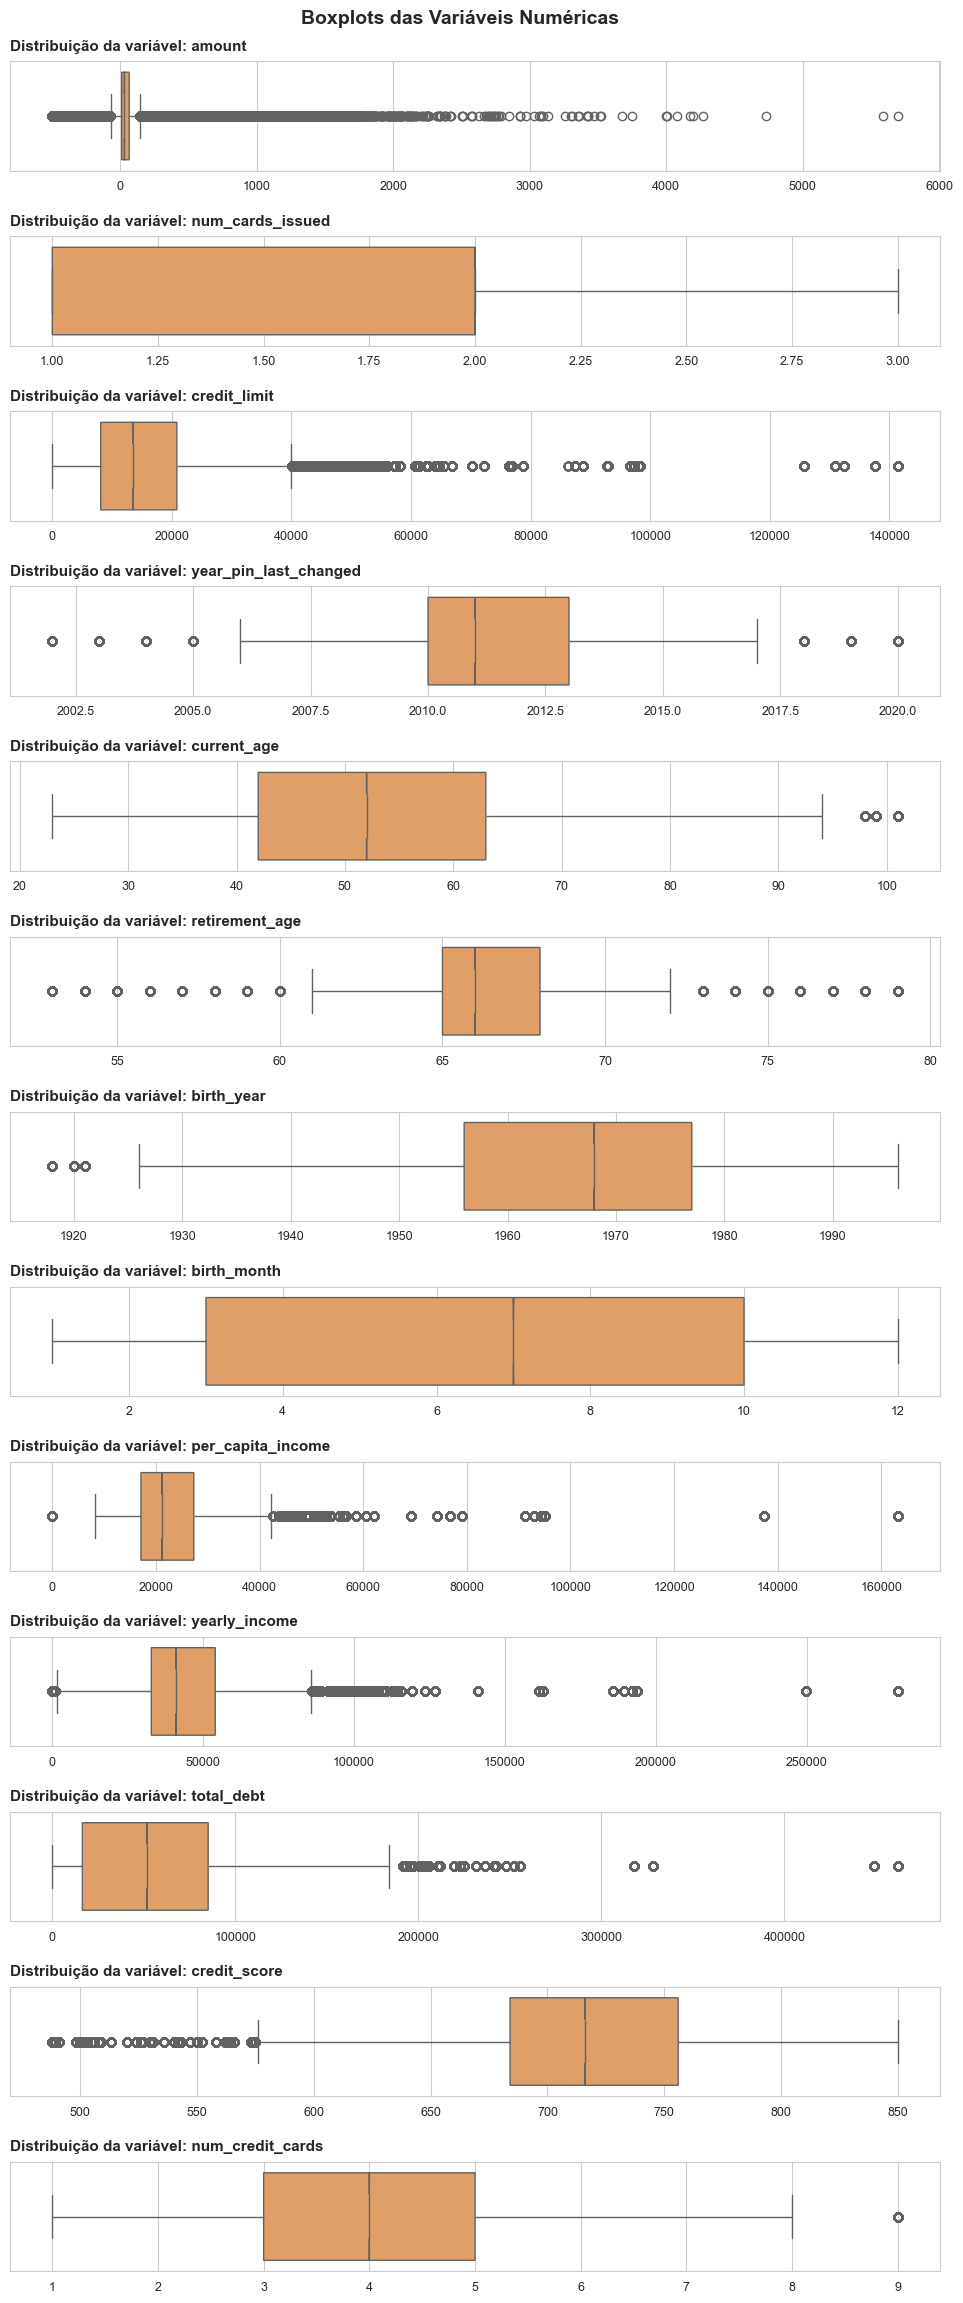

In [ ]:
# Seleciona as variáveis numéricas e remove as colunas indesejadas
colunas_numericas = df_train_val.select_dtypes(
    include=['number']).columns.drop(colunas_excluir)

# Número de gráficos a serem exibidos
n_plots = len(colunas_numericas)

# Cria a figura e os subplots dinamicamente
fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2 * n_plots),
                        gridspec_kw={'hspace': 0.6})

# Se houver apenas um gráfico, ajusta axs para ser uma lista
if n_plots == 1:
    axs = [axs]

# Loop para criar cada boxplot
for ax, col in zip(axs, colunas_numericas):
    sns.boxplot(x=df_train_val[col], ax=ax, notch=True, 
                color='#f39e53', orient='h')
    
    # Define título e remove rótulos dos eixos para evitar poluição visual
    ax.set_title(f'Distribuição da variável: {col}', loc='left', fontsize=11,
                 pad=8, fontweight='bold')
    ax.set(xlabel='', ylabel='')
    
    # Ajusta o tamanho dos rótulos
    ax.tick_params(labelsize=9)
    
    # Exibe os números no eixo x sem notação científica
    ax.ticklabel_format(style='plain', axis='x')

# Ajuste manual do espaço superior (local do título)
fig.subplots_adjust(top=0.96)

# Adiciona um título geral
fig.suptitle(
    'Boxplots das Variáveis Numéricas', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


#### 4.2.3. Análise dos outliers identificados

In [ ]:
# Seleciona as variáveis numéricas e remove as colunas indesejadas
colunas_numericas = df_train_val.select_dtypes(
    include=['number']).columns.drop(colunas_excluir)

# Lista para armazenar as informações de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df_train_val[col].quantile(.25)
    Q3 = df_train_val[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df_train_val[col] < limite_inferior).sum()
    outliers_acima = (df_train_val[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df_train_val.shape[0]
    
    # Armazena resultados em um dicionário
    resultados_outliers.append({
        'Variável': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicionários em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Variável (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))



Resumo dos Outliers por Variável (ordenado por maior %)


,Variável,IIQ,Limite Inferior,Limite Superior,Outliers Abaixo,Outliers Acima,Total Outliers,% Outliers
0,retirement_age,3.00,60.50,72.50,270747,204537,475284,10.662
1,amount,54.76,-73.22,145.82,129803,223515,353318,7.926
2,per_capita_income,10195.00,1820.50,42600.50,24801,244116,268917,6.033
3,yearly_income,21196.00,1023.00,85807.00,14760,235454,250214,5.613
4,year_pin_last_changed,3.00,2005.50,2017.50,64869,143782,208651,4.681
5,credit_limit,12739.00,-11008.50,39947.50,0,153245,153245,3.438
6,credit_score,72.00,576.00,864.00,147559,0,147559,3.310
7,total_debt,68723.00,-86647.50,188244.50,0,97803,97803,2.194
8,current_age,21.00,10.50,94.50,0,30472,30472,0.684
9,birth_year,21.00,1924.50,2008.50,30472,0,30472,0.684


Ao analisar as 13 variáveis numéricas selecionadas para o estudo de outliers, observou-se que 11 delas apresentavam valores atípicos. Partindo da premissa de que os dados são corretos e representam informações verídicas, e não erros de medição ou de entrada, a remoção desses outliers foi descartada. Isso porque tais transações podem, de fato, ocorrer na realidade, inclusive em casos de fraude. Além disso, para a análise de dados e a construção de um modelo preditivo de detecção, a presença desses eventos extremos é fundamental para capturar a variabilidade real dos dados e garantir a robustez do modelo.

#### 4.2.4. Distribuição dos dados em gráfico histograma

In [ ]:
# Função para gerar gráficos histogramas para variáveis numéricas do dataframe.

def gerar_graficos_histogramas(dataframe, colunas_excluir=None, bins=25, kde=True):
    '''
    Função para gerar histogramas para todas as variáveis numéricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param colunas_excluir: list, opcional
        Lista de colunas a serem excluídas da análise (padrão: None).
    :param bins : int, opcional
        Número de bins (intervalos) do histograma (padrão: 25).
    :param kde : bool, opcional
        Se True, inclui a curva de densidade (padrão: True).
    '''
    # Seleciona as variáveis numéricas e remove as colunas indesejadas
    colunas_numericas = dataframe.select_dtypes(
        include=['number']).columns.drop(colunas_excluir)

    # Calcula a quantidade de subplots necessários
    qtde_subplots = len(colunas_numericas)

    # Configuração para múltiplos gráficos: 2 colunas por linha
    colunas_subplot = 2
    qtde_linhas = -(-qtde_subplots // colunas_subplot)

    # Criação da figura com subplots
    fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

    # Transformação do array de subplots para facilitar o loop
    axs = axs.flatten()

    # Remove subplots vazios, caso existam
    for i in range(qtde_subplots, len(axs)):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas para criar os histogramas
    for i, coluna in enumerate(colunas_numericas):
        sns.histplot(data=dataframe, x=coluna, ax=axs[i], bins=bins, kde=kde, 
                     color='#61b3ef')

        # Configura o título e remove os rótulos dos eixos
        axs[i].set_title(f'Distribuição da variável: {coluna}', fontsize=12, 
                         loc='left', fontweight='bold')
        axs[i].set(xlabel='', ylabel='')

        # Ajusta o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)

        # Exibe rótulos sem notação científica
        axs[i].ticklabel_format(style='plain', axis='y')

    # Adiciona um título geral
    fig.suptitle('Histogramas das Variáveis Numéricas', fontsize=14, fontweight='bold')

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, top=0.95) # Mais espaço entre os gráficos
    plt.show()


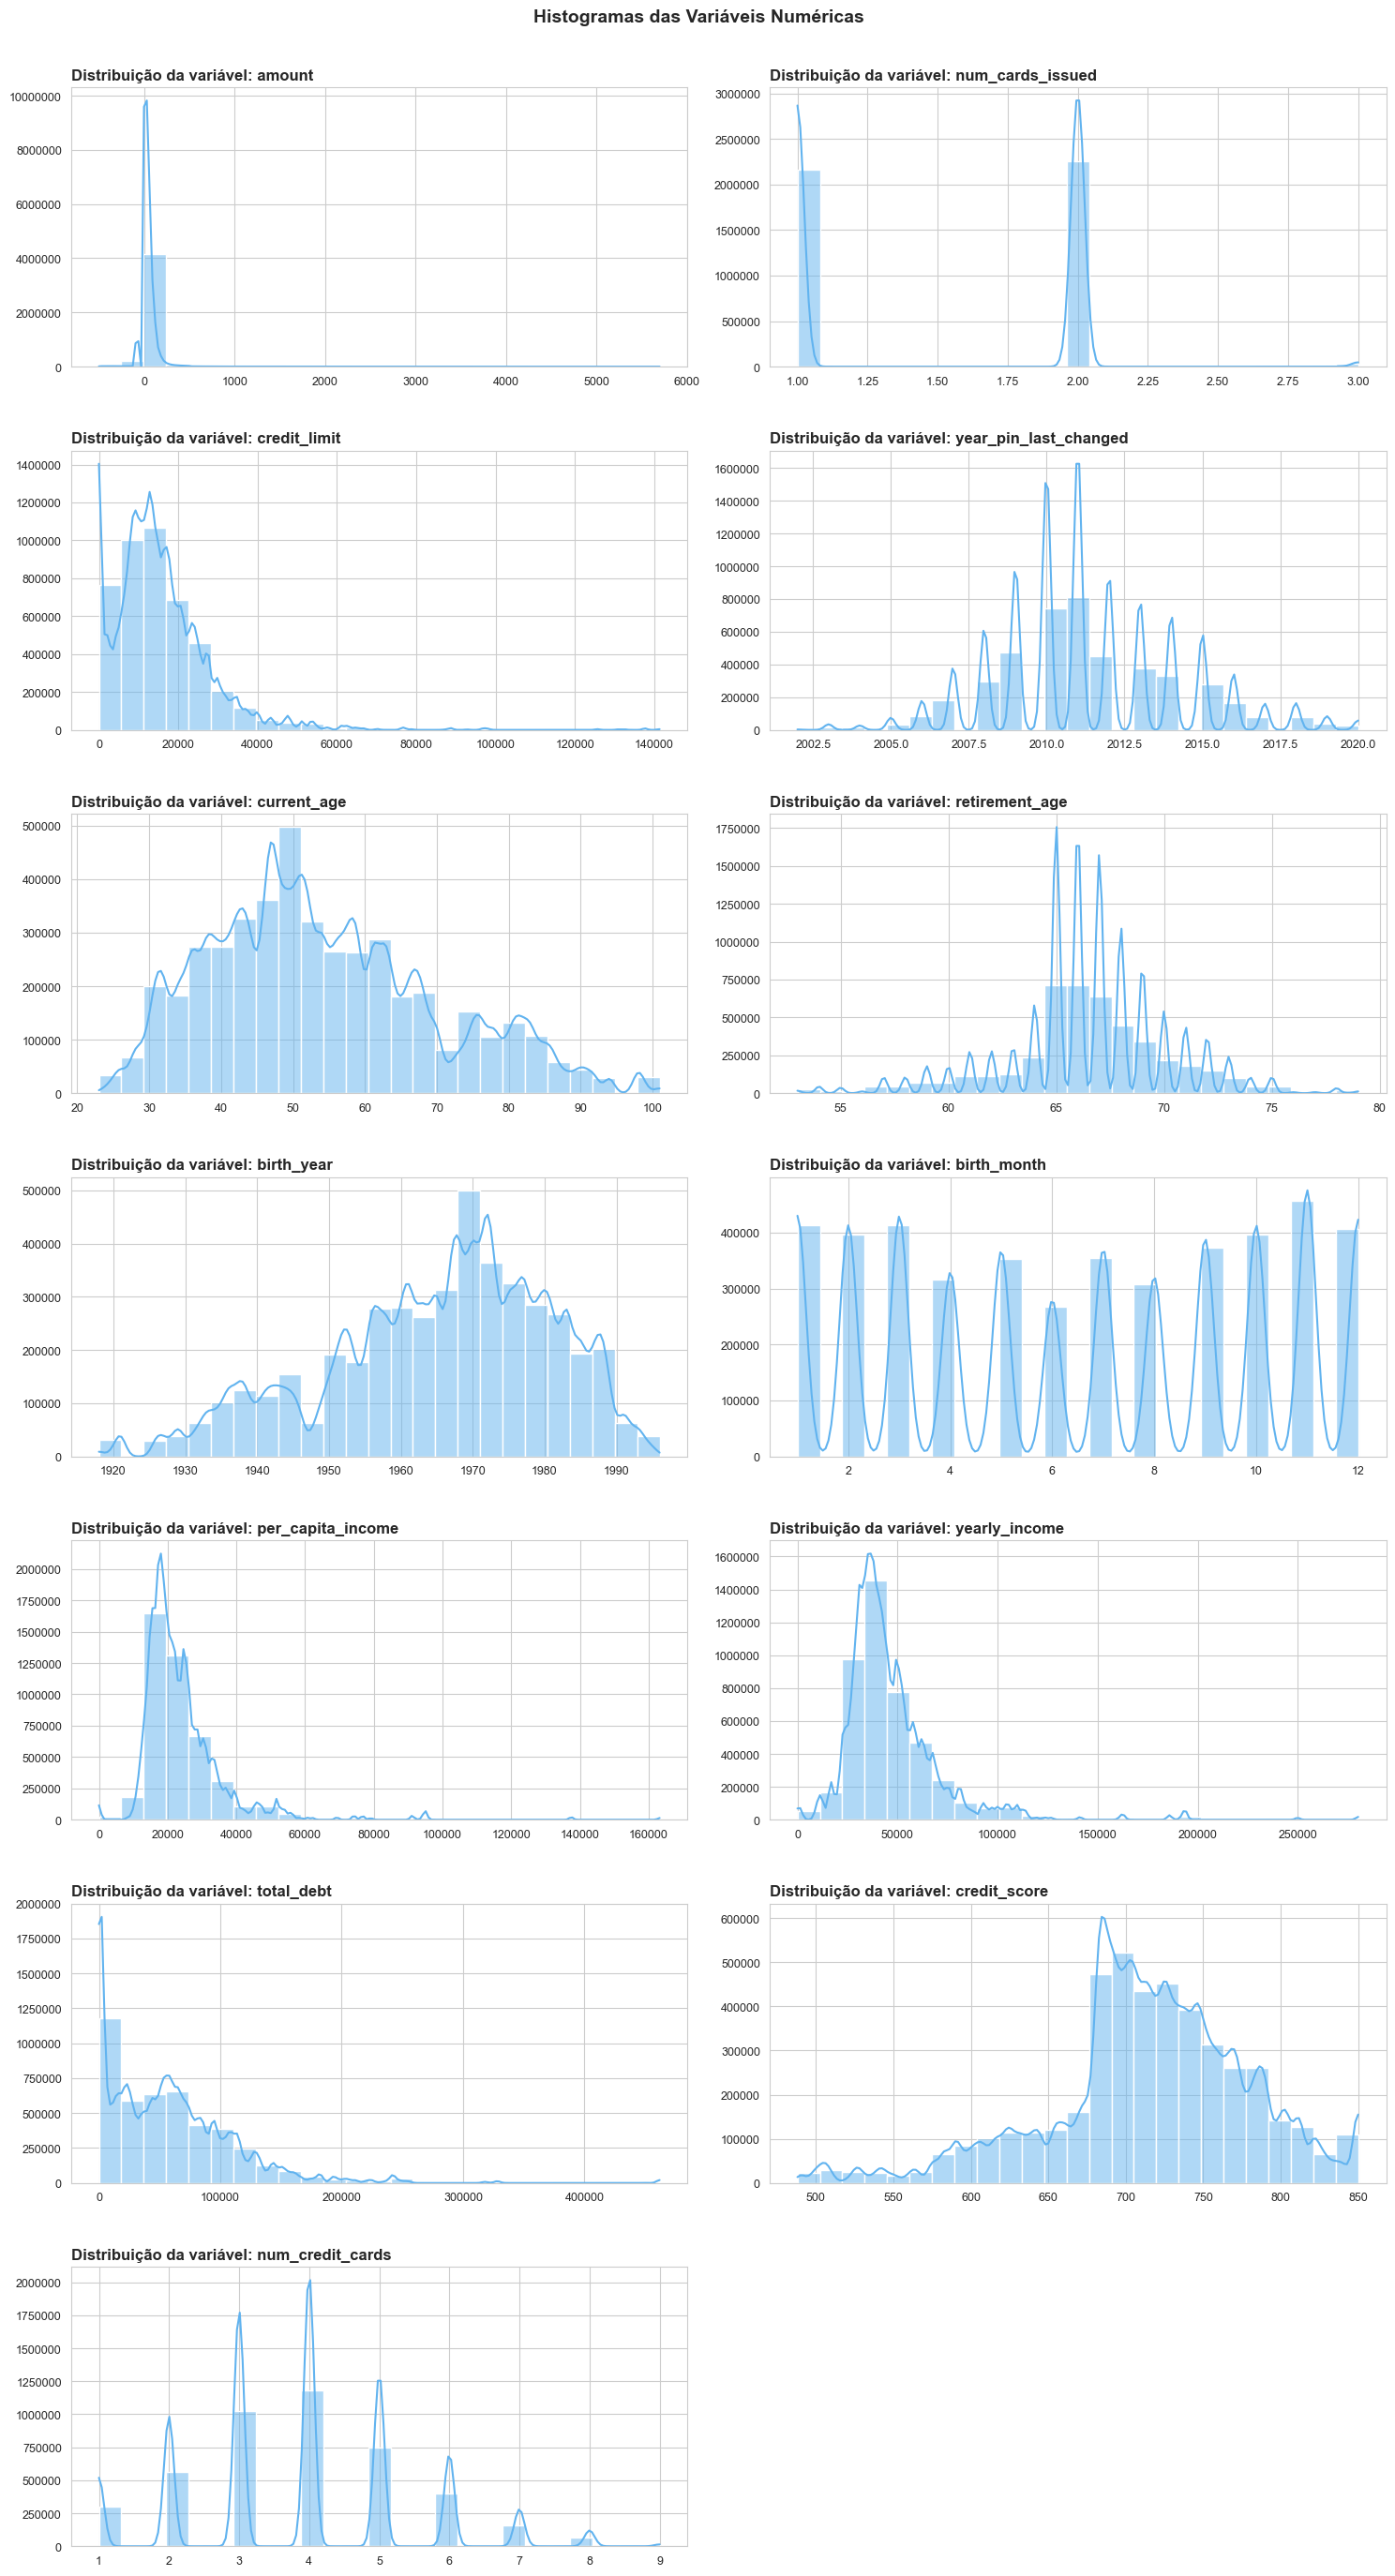

In [ ]:
# Chamada da função para geração dos histogramas

gerar_graficos_histogramas(df_train_val, colunas_excluir)

**Insights extraídos**

- **amount (valor):** Forte concentração de valores abaixo de US<em>&#36;</em> 500 e próximos a zero, com presença de valores negativos (possivelmente estornos, taxas ou ajustes).
- **num_cards_issued (número de cartões emitidos):** A maioria dos clientes possui entre 1 e 2 cartões emitidos, possivelmente refletindo a emissão inicial ao abrir a conta ou a emissão gradual ao longo do tempo.  
- **credit_limit (limite de crédito):** O limite de crédito mais frequente situa-se entre US<em>&#36;</em> 1.000 e US<em>&#36;</em> 1.500, mas há uma minoria com limites substancialmente maiores. A presença de limites zerados pode indicar bloqueios ou regras de negócio específicas.
- **year_pin_last_changed (ano da última alteração do PIN):** Entre 2010 e 2012, houve o maior número de alterações de PIN, o que pode sinalizar maior conscientização de segurança, adoção de novas tecnologias ou mudanças nas políticas internas de segurança.  
- **current_age (idade do cliente):** Aproximadamente 50 anos é a faixa etária predominante entre os clientes, sem incidência de idades negativas.  
- **retirement_age (idade esperada para aposentadoria):** 65 e 66 anos são as idades mais comuns para aposentadoria.  
- **birth_year (ano de nascimento):** 1970 é o ano de nascimento mais frequente entre os clientes.  
- **birth_month (mês de nascimento):** Novembro concentra o maior número de nascimentos.
- **per_capita_income (renda per capita):** A maior parte dos clientes possui renda per capita entre US<em>&#36;</em> 15.000 e US<em>&#36;</em> 20.000.
- **yearly_income (renda anual):** US<em>&#36;</em> 40.000 é a renda anual de maior predominância entre os clientes.  
- **total_debt (dívida total):** A dívida total dos clientes concentra-se em torno de US<em>&#36;</em> 1.000, mas há um segundo pico em aproximadamente de US<em>&#36;</em> 5.000, indicando clientes com dívidas significativamente mais altas.
- **credit_score (score de crédito):** A maioria dos clientes encontram-se nas faixas superiores a 700 pontos, o que é considerado um perfil razoavelmente bom, ainda assim, há uma parcela relevante de clientes com pontuações mais baixas. 
- **num_credit_cards (número de cartões de crédito ativos):** 4 cartões ativos é a quantidade mais frequente entre os clientes, sugerindo que muitos possuam cartões adicionais de outras instituições.

#### 4.2.5. Distribuição dos dados em gráfico de barras (countplot)

In [ ]:
# Lista de colunas que serão excluídas da análise
colunas_excluir = [
    'merchant_city', 'merchant_state', 'expires', 'acct_open_date', 'address', 'description'
]

In [ ]:
# Função para gerar gráficos de barras (countplots) para todas as variáveis categóricas do dataframe.

def gerar_countplots(dataframe, colunas_excluir=None, limite_categorias=20):
    '''
    Função para gerar gráficos de barras (countplots) para todas as 
    variáveis categóricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param colunas_excluir: list, opcional
        Lista de colunas a serem excluídas da análise (padrão: None).
    :param limite_categorias : int, opcional
        Número máximo de categorias exibidas em cada gráfico (padrão: 20).
    '''
    # Seleciona as variáveis categóricas e remove as indesejadas
    colunas_categoricas = dataframe.select_dtypes(
        include=['object', 'category']).columns.drop(colunas_excluir)

    # Calcula a quantidade de subplots necessários
    qtde_subplots = len(colunas_categoricas)

    # Configuração para múltiplos gráficos: 2 colunas por linha
    colunas_subplot = 2
    qtde_linhas = -(-qtde_subplots // colunas_subplot)

    # Criação da figura com subplots
    fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

    # Transformação do array de subplots para facilitar o loop
    axs = axs.flatten()

    # Remove subplots vazios, caso existam
    for i in range(qtde_subplots, len(axs)):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis categóricas para criar os countplots
    for i, coluna in enumerate(colunas_categoricas):
        # Conta os valores da variável e ordena do maior para o menor
        dados_coluna = dataframe[coluna].value_counts().iloc[:limite_categorias]

        sns.barplot(x=dados_coluna.values, y=dados_coluna.index, ax=axs[i],
            color='#61b3ef')

        # Configura o título e remove os rótulos dos eixos
        axs[i].set_title(f'Distribuição da variável: {coluna}', fontsize=12, 
                         loc='left', fontweight='bold')
        axs[i].set(xlabel='', ylabel='')

        # Ajusta o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)

        # Adiciona os valores no final das barras
        for p in axs[i].patches:
            axs[i].annotate(
                f'{int(p.get_width()):,}'.replace(',', '.'),  # Formatação com separador de milhar
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=9, fontweight='bold',
                color='black',
                xytext=(5, 0),
                textcoords='offset points'
            )
        
                # Exibe rótulos sem notação científica
        axs[i].ticklabel_format(style='plain', axis='x')
            
    # Adiciona um título geral
    fig.suptitle('Gráficos de Barras das Variáveis Categóricas', fontsize=14, fontweight='bold')            

    # Ajuste do layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, top=0.94) # Mais espaço entre os gráficos
    plt.show()


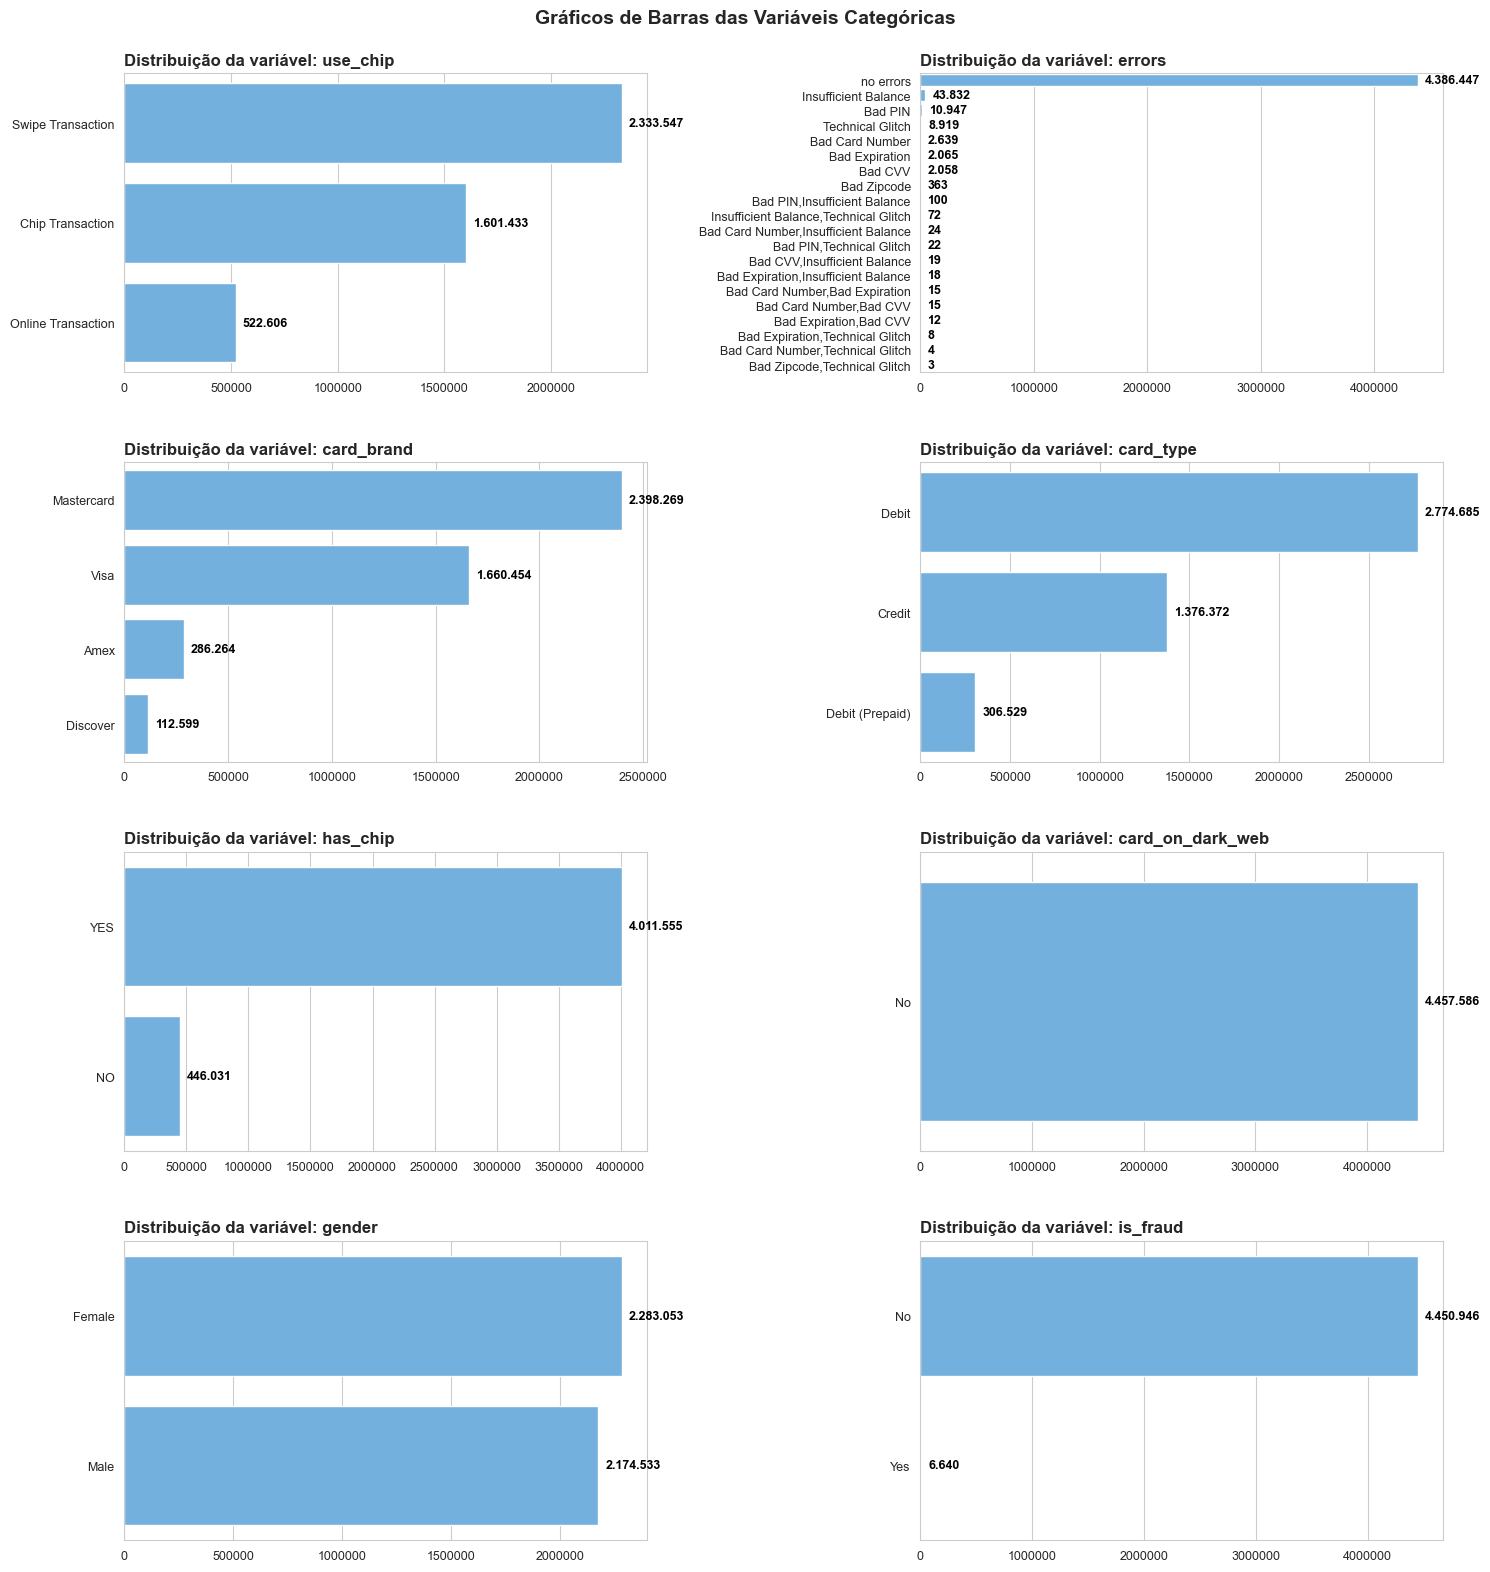

In [ ]:
# Chamada da função para geração dos countplots

gerar_countplots(df_train_val, colunas_excluir)

**Insights extraídos**

- **use_chip (tipo de transação):** Transações realizadas com cartão com chip ou via tarja magnética somam mais de 3 milhões, enquanto as transações online ultrapassam 500 mil. Esse volume sugere ampla adoção de cartões com chip, mas ainda há uso considerável de tarja magnética e canais online.
- **errors (erros nas transação):** Aproximadamente 73 mil transações apresentaram algum tipo de erro, em contrapartida, mais de 4 milhões de transações foram concluídas com sucesso. Entre os erros mais comuns, destacam-se _"Insufficient Balance"_ e _"Wrong PIN"_, o que pode indicar oportunidades de melhoria em segurança e controle de saldo.
- **card_brand (bandeira do cartão):** As bandeiras Mastercard e Visa, somadas, representam mais de 4 milhões de transações, isso evidencia a dominância dessas bandeiras no mercado. As demais bandeiras totalizam menos de 400 mil transações.
- **card_type (tipo de cartão):** Cartões de débito são os mais usados, com mais de 2,7 milhões de transações, em seguida, aparecem os cartões de crédito (1,3 milhão) e, por fim, os pré-pagos (mais de 300 mil). O alto uso de débito pode indicar um perfil de clientes que prefere pagamentos imediatos.
- **has_chip (indica se o cartão possui chip):** Mais de 4 milhões de transações envolvem cartões com chip e menos de 446 mil transações foram feitas com cartões sem chip. A adoção de chip é ampla, mas ainda existe um volume considerável de cartões sem chip.
- **card_on_dark_web (indica se o cartão consta na dark web):** Nenhum cartão foi encontrado na dark web neste conjunto de dados, porém, manter políticas de monitoramento e prevenção é essencial para garantir segurança contínua.
- **gender (gênero do cliente):** Há cerca de 2,2 milhões de clientes do gênero feminino e o gênero masculino corresponde a aproximadamente 2,1 milhões de clientes, o que demonstra que há uma distribuição relativamente equilibrada.
- **is_fraud (indica se a transação foi fraudulenta):** Apenas cerca de 6 mil transações são identificadas como fraudulentas, em contrapartida, mais de 4,4 milhões de transações são legítimas. Apesar do baixo volume de fraudes, é fundamental analisar se existem padrões que possam orientar estratégias de prevenção e detecção.

## 5. Análise exploratória dos dados

### 5.1. Distribuição dos valores transacionados segmentados por transações legítimas e fraudulentas

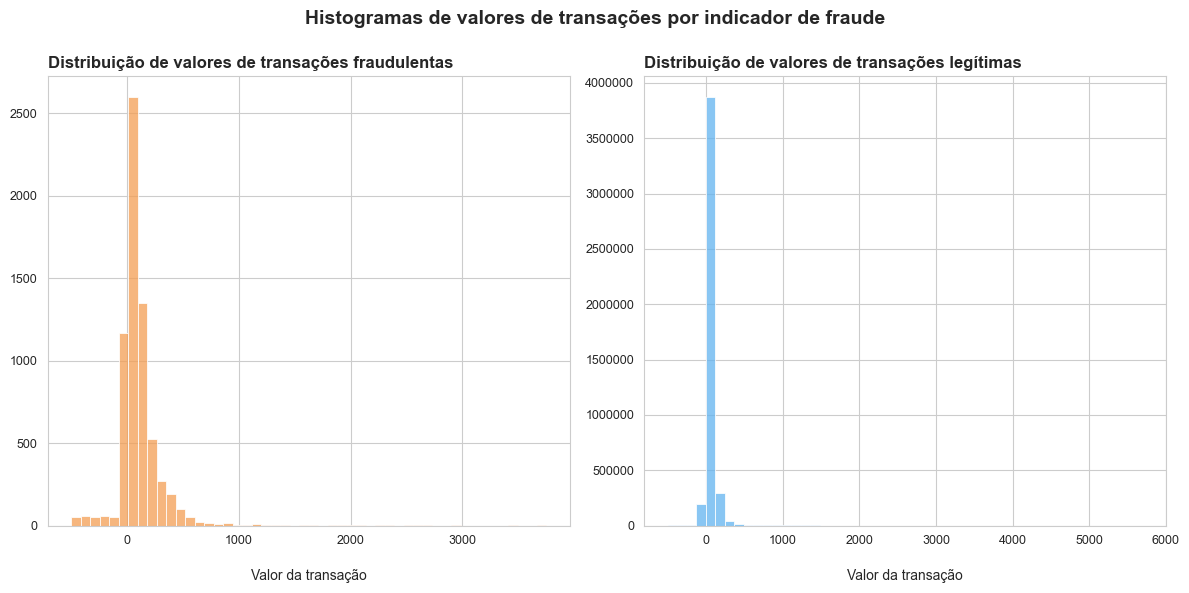

In [ ]:
# Filtrando os dados considerando apenas as transações fraudulentas e não fraudulentas
df_fraud_yes = df_train_val[df_train_val['is_fraud'] == 'Yes']
df_fraud_no = df_train_val[df_train_val['is_fraud'] == 'No']

# Dicionário para armazenar os dataframes filtrados
dict_dfs = {
    'fraudulentas': df_fraud_yes, 
    'legítimas': df_fraud_no
}

# Criação da figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Loop sobre os dataframes para criar os histogramas
for i, (title, df) in enumerate(dict_dfs.items()):
        # Escolhendo cores distintas para cada classe
    color = '#f39e53' if title == 'fraudulentas' else '#61b3ef'
    
    # Gerando o histograma sem KDE
    sns.histplot(data=df, x='amount', ax=axs[i], bins=50, kde=False, color=color)
    
    # Configura o título e os rótulos dos eixos
    axs[i].set_title(f'Distribuição de valores de transações {title}', 
                     fontsize=12, loc='left', fontweight='bold')
    axs[i].set(xlabel='\nValor da transação', ylabel='')
    
    # Ajusta o tamanho dos rótulos
    axs[i].tick_params(labelsize=9)
    
    # Exibe rótulos sem notação científica
    axs[i].ticklabel_format(style='plain', axis='y')

# Adiciona um título geral
fig.suptitle('Histogramas de valores de transações por indicador de fraude', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.87) # Mais espaço entre os gráficos
plt.show()

In [306]:
# Calculando a descrição estatística para as transações legítimas e fraudulentas
desc_fraud_yes = df_fraud_yes[['amount']].describe().T
desc_fraud_no = df_fraud_no[['amount']].describe().T

# Concatenando as duas descrições com o índice definido como 'fraud'
df_describe = pd.concat([desc_fraud_yes, desc_fraud_no], 
                        keys=['Legítimas', 'Fraudulentas'])
df_describe = df_describe.reset_index()

# Remover a coluna 'level_1'
df_describe = df_describe.drop(columns=['level_1'])

# Renomear a coluna 'level_0' para 'transações'
df_describe = df_describe.rename(columns={'level_0': 'transações'})

# Exibindo o resultado
df_describe

,transações,count,mean,std,min,25%,50%,75%,max
0,Legítimas,6640.0,110.780038,213.088580,-497.0,17.9875,70.655,150.8925,3750.60
1,Fraudulentas,4450946.0,42.876152,81.288446,-500.0,8.9200,28.940,63.5700,5696.78


### 5.2. Distribuição dos valores transacionados por comportamento temporal e taxa de fraude

In [ ]:
# Convertendo a coluna 'date' para datetime
df_train_val['date'] = pd.to_datetime(df_train_val['date'])

#### 5.2.1. Distribuição dos valores transacionados por ano e a taxa de fraude

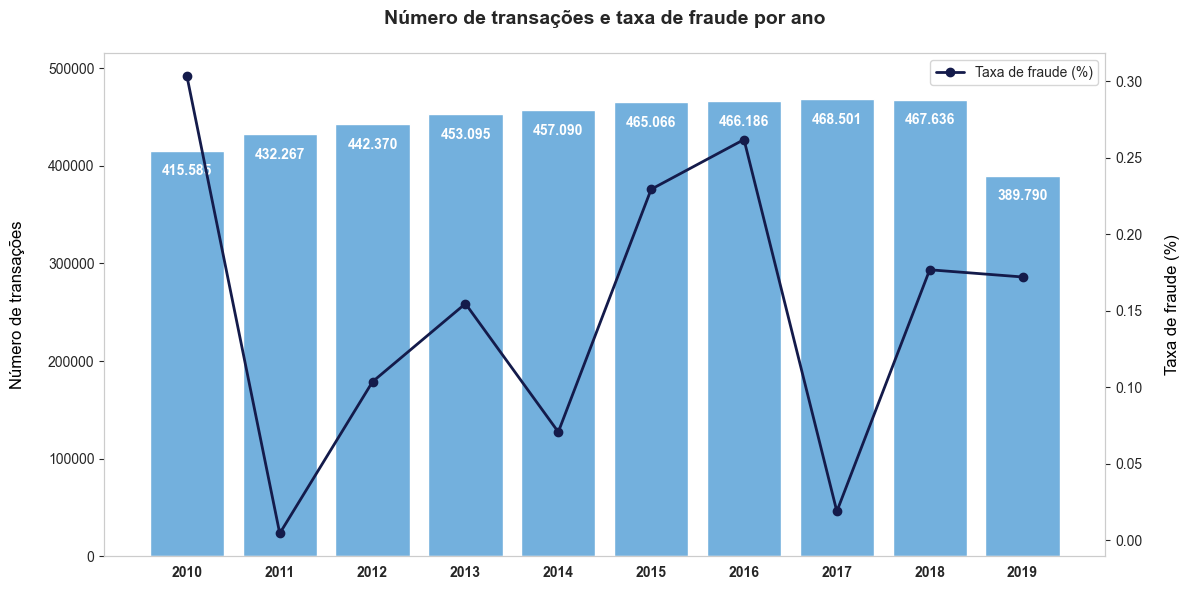

In [ ]:
# Calculando a taxa de fraude por ano
df_plot = df_train_val.groupby(df_train_val['date'].dt.year).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'year'
df_plot.rename(columns={'date': 'year'}, inplace=True)
df_plot['year_name'] = df_plot['year'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y').strftime('%Y'))

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot['fraud_rate'] = df_plot['fraudulent_transactions'] / df_plot['total_transactions']

# Ordenando os anos para garantir a ordem correta
df_plot = df_plot.set_index('year').sort_index().reset_index()

# Criando o gráfico de barras para transações por ano
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot['year_name'], y=df_plot['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -20),  # Distância do texto para a barra
        textcoords='offset points'
    )

# Remover as linhas de grade
ax1.grid(False)

# Corrigir o limite do eixo y
ax1.set_ylim(0, df_plot['total_transactions'].max() * 1.1)  # Ajustando o limite do eixo y

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')
    
# Criando o segundo eixo y para a taxa de fraude
color_line = '#141b4b'
ax2 = ax1.twinx()  # Cria um segundo eixo y
ax2.plot(df_plot['year_name'], df_plot['fraud_rate'] * 100, marker='o', linestyle='-', 
         color=color_line, linewidth=2, markersize=6, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por ano\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

#### 5.2.2. Distribuição dos valores transacionados por mês e a taxa de fraude

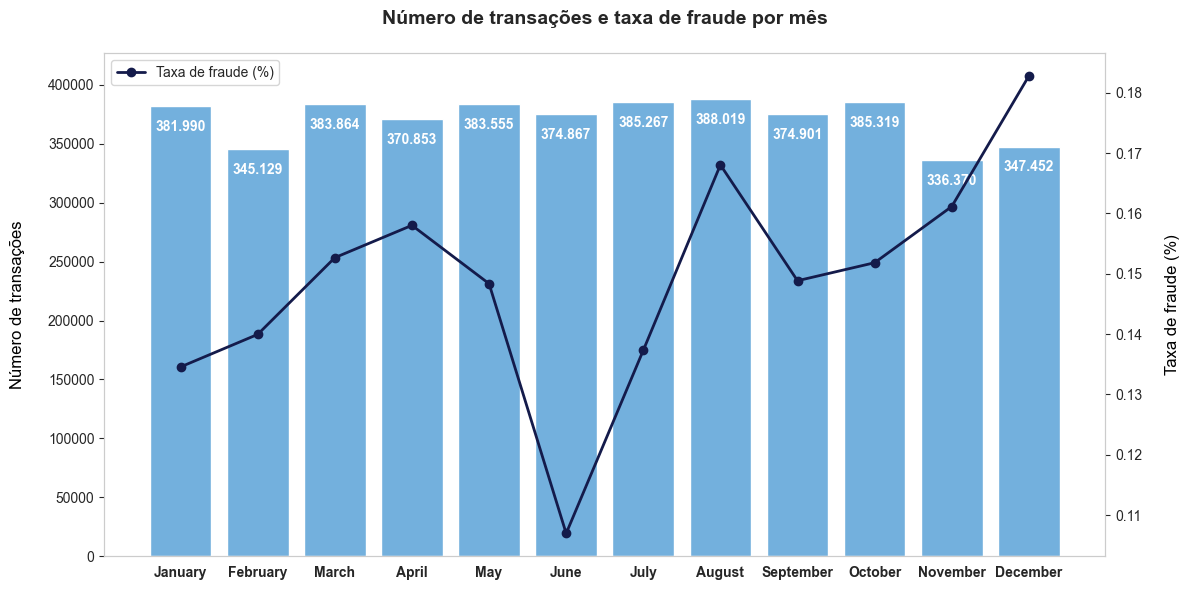

In [248]:
# Calculando a taxa de fraude por mês
df_plot = df_train_val.groupby(df_train_val['date'].dt.month).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'month'
df_plot.rename(columns={'date': 'month'}, inplace=True)
df_plot['month_name'] = df_plot['month'].apply(
    lambda x: pd.to_datetime(str(x), format='%m').month_name())

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot['fraud_rate'] = df_plot['fraudulent_transactions'] / df_plot['total_transactions']

# Ordenando os anos para garantir a ordem correta
df_plot = df_plot.set_index('month').sort_index().reset_index()

# Criando o gráfico de barras para transações por mês
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot['month_name'], y=df_plot['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -20),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Corrigir o limite do eixo y
ax1.set_ylim(0, df_plot['total_transactions'].max() * 1.1)  # Ajustando o limite do eixo y

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
color_line = '#141b4b'
ax2 = ax1.twinx()  # Cria um segundo eixo y
ax2.plot(df_plot['month_name'], df_plot['fraud_rate'] * 100, marker='o', linestyle='-', 
         color=color_line, linewidth=2, markersize=6, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por mês\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

#### 5.2.3. Distribuição dos valores transacionados por dia da semana e a taxa de fraude

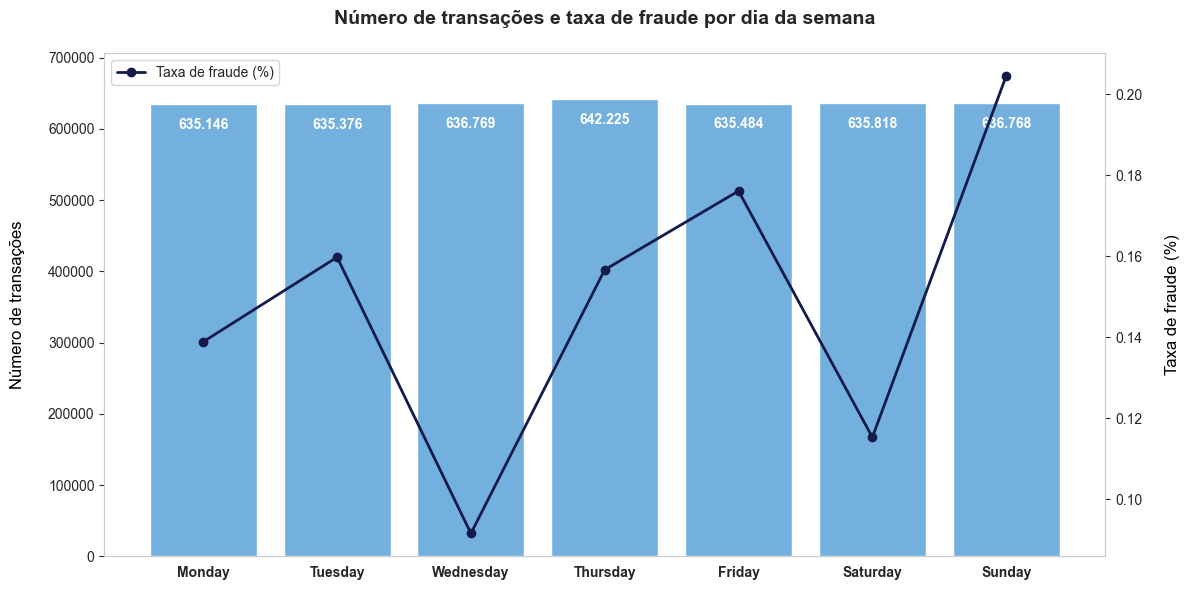

In [249]:
# Calculando a taxa de fraude por dia da semana
df_plot = df_train_val.groupby(df_train_val['date'].dt.day_name()).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'day_name'
df_plot.rename(columns={'date': 'day_name'}, inplace=True)

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot['fraud_rate'] = df_plot['fraudulent_transactions'] / df_plot['total_transactions']

# Ordenando os anos para garantir a ordem correta
df_plot = df_plot.set_index('day_name').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Criando o gráfico de barras para transações por dia da semana
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot['day_name'], y=df_plot['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -20),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Corrigir o limite do eixo y
ax1.set_ylim(0, df_plot['total_transactions'].max() * 1.1)  # Ajustando o limite do eixo y

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
color_line = '#141b4b'
ax2 = ax1.twinx()  # Cria um segundo eixo y
ax2.plot(df_plot['day_name'], df_plot['fraud_rate'] * 100, marker='o', linestyle='-', 
         color=color_line, linewidth=2, markersize=6, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por dia da semana\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

#### 5.2.4. Distribuição dos valores transacionados por hora e a taxa de fraude

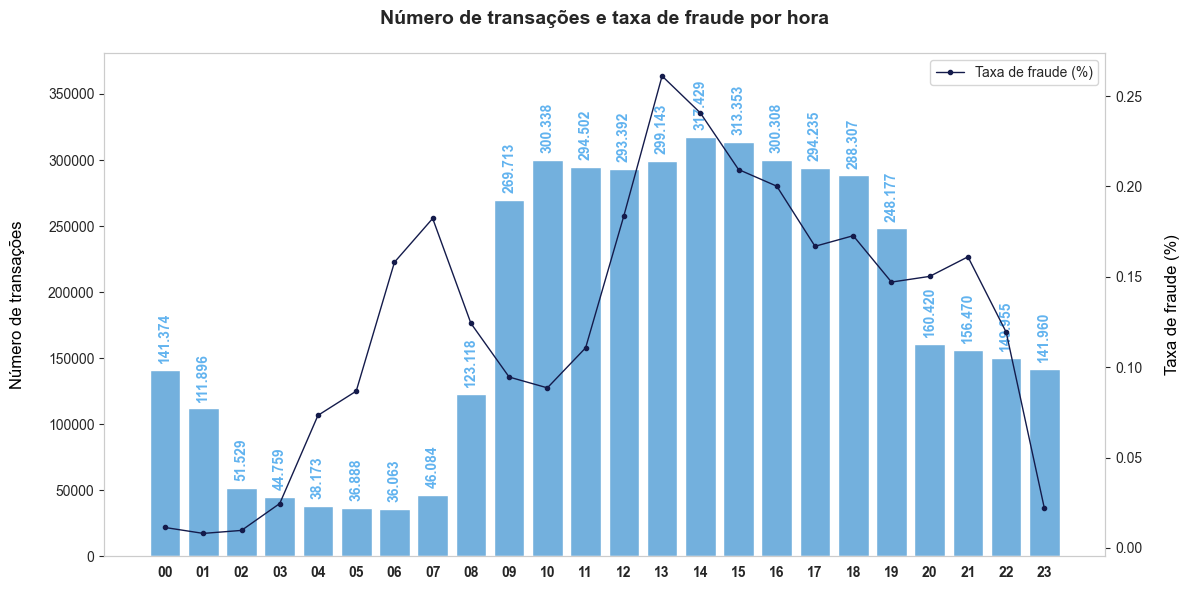

In [294]:
# Calculando a taxa de fraude por hora
df_plot = df_train_val.groupby(df_train_val['date'].dt.hour).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'hour'
df_plot.rename(columns={'date': 'hour'}, inplace=True)
df_plot['hour_name'] = df_plot['hour'].apply(
    lambda x: pd.to_datetime(str(x), format='%H').strftime('%H'))

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot['fraud_rate'] = df_plot['fraudulent_transactions'] / df_plot['total_transactions']

# Ordenando os horas para garantir a ordem correta
df_plot = df_plot.set_index('hour').sort_index().reset_index()

# Criando o gráfico de barras para transações por hora
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot['hour_name'], y=df_plot['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='#61b3ef',
        xytext=(0, 5),  # Distância do texto para a barra
        textcoords='offset points',
        rotation=90  # Rotação do texto para vertical
    )

# Remover as linhas de grade
ax1.grid(False)

# Corrigir o limite do eixo y
ax1.set_ylim(0, df_plot['total_transactions'].max() * 1.2)  # Ajustando o limite do eixo y

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')
    
# Criando o segundo eixo y para a taxa de fraude
color_line = '#141b4b'
ax2 = ax1.twinx()  # Cria um segundo eixo y
ax2.plot(df_plot['hour_name'], df_plot['fraud_rate'] * 100, marker='o', linestyle='-', 
         color=color_line, linewidth=1, markersize=3, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por hora\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()